# Working with MNIST Sign Language

## Importing Dataset and Testing Accuracy 

## Mounting drive

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**UnZipping The File**

In [0]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/DATASETS/sign-language-mnist.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


## Visualising the Images

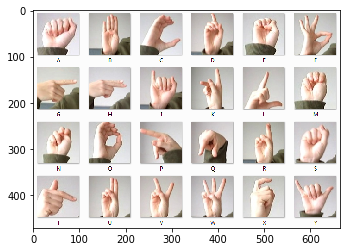

In [0]:
import matplotlib.pyplot as plt
im = plt.imread('/content/amer_sign2.png')
plt.imshow(im)
plt.show()

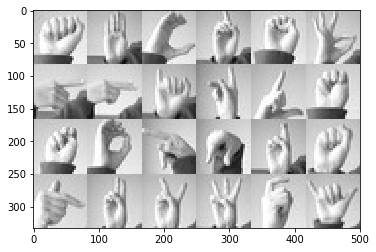

In [0]:
import matplotlib.pyplot as plt
im = plt.imread('/content/amer_sign3.png')
plt.imshow(im)
plt.show()

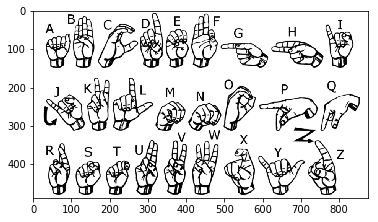

In [0]:
import matplotlib.pyplot as plt
im = plt.imread('/content/american_sign_language.PNG')
plt.imshow(im)
plt.show()

**Importing Libraries**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Test Train Datasets**

In [0]:
train = pd.read_csv('/content/sign_mnist_train.csv')
test = pd.read_csv('/content/sign_mnist_test.csv')

In [0]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [0]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,152,152,152,152,152,153,153,151,152,152,153,152,152,151,151,150,150,150,149,150,150,150,152,152,151,152,152,152,152,152,...,131,134,144,147,125,87,87,103,107,110,116,113,75,74,74,74,76,74,82,134,168,155,146,137,145,146,149,135,124,125,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,138,137,137,138,138,139,137,142,140,138,139,137,137,136,135,134,133,134,132,129,132,134,135,135,137,139,139,139,140,141,...,114,112,89,48,133,194,182,185,184,184,182,181,172,174,177,178,178,179,181,183,187,175,165,154,118,107,100,75,96,83,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,152,157,163,168,171,182,172,175,185,183,184,185,185,185,183,183,182,181,178,86,88,93,96,108,125,137,145,149,154,160,...,145,123,78,162,239,227,229,226,226,225,224,222,89,91,94,111,136,154,167,184,125,3,166,225,195,188,172,185,161,122,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,209,208,207,207,209,208,210,210,207,209,209,208,209,210,209,207,208,209,207,206,208,209,208,208,210,211,210,211,209,209,...,85,80,84,151,238,255,255,250,237,245,250,232,103,101,102,103,95,208,231,227,209,190,179,182,152,150,159,119,83,63,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,203,204,204,204,203,202,198,216,217,135,181,200,195,194,193,190,189,187,185,190,194,196,197,200,202,204,206,207,207,206,...,93,52,24,53,63,33,41,51,48,45,49,55,149,150,150,148,147,151,124,82,84,81,69,81,111,103,84,75,53,28,26,40,64,48,29,46,49,46,46,53


**Dataset Handling**

In [0]:
label=train['label'].values
train.drop('label',axis=1, inplace=True)

In [0]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,163,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,159,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,185,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,209,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,191,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [0]:
label

array([ 3,  6,  2, ..., 18, 17, 23])

## Reshaping the Images and Resizing them to desired dimension

In [0]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

In [0]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
label = label_binrizer.fit_transform(label)
label

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

## Train Test split of the train dataset

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, label, test_size = 0.2, random_state = 42)

**Visualizing images after normalizing**

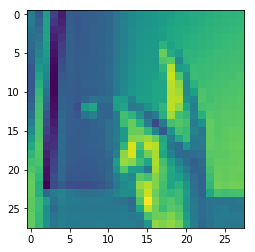

In [0]:
batch_size = 128
num_classes = 24
epochs = 25

#Normalizing the training and test data

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

#Visualizing the image after normalizing

plt.imshow(x_train[0].reshape(28,28))


In [0]:
x_train[0].shape

(28, 28, 1)

## Creating CNN model

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

img_input = layers.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(24, activation='softmax')(x)

model = Model(img_input, output)
model.summary()


W0717 13:10:01.952893 140112938936192 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0     

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['acc'])

**Checking Accuracy**

In [0]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=25, batch_size=batch_size)

Train on 21964 samples, validate on 5491 samples
Epoch 1/25
21964/21964 [==============================] - 26s 1ms/sample - loss: 2.5757 - acc: 0.2054 - val_loss: 1.5537 - val_acc: 0.5185
Epoch 2/25
21964/21964 [==============================] - 25s 1ms/sample - loss: 1.1989 - acc: 0.5900 - val_loss: 0.7777 - val_acc: 0.7556
Epoch 3/25
21964/21964 [==============================] - 26s 1ms/sample - loss: 0.7450 - acc: 0.7440 - val_loss: 0.5234 - val_acc: 0.8359
Epoch 4/25
21964/21964 [==============================] - 25s 1ms/sample - loss: 0.5065 - acc: 0.8284 - val_loss: 0.3601 - val_acc: 0.8898
Epoch 5/25
21964/21964 [==============================] - 26s 1ms/sample - loss: 0.3633 - acc: 0.8791 - val_loss: 0.2299 - val_acc: 0.9306
Epoch 6/25
21964/21964 [==============================] - 25s 1ms/sample - loss: 0.2524 - acc: 0.9179 - val_loss: 0.1586 - val_acc: 0.9585
Epoch 7/25
21964/21964 [==============================] - 25s 1ms/sample - loss: 0.1815 - acc: 0.9419 - val_loss: 0.0

## Checking train test accuracy

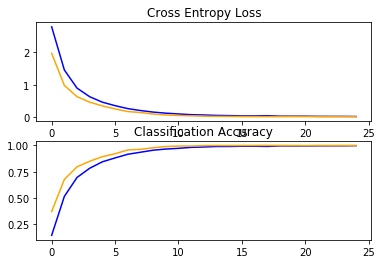

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

## Augmentation and accuracy

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)


datagen.fit(x_train)

model.fit_generator(datagen.flow(x_train, y_train, batch_size=128),
                    steps_per_epoch=len(x_train) / 128, epochs=20)

Epoch 1/20
172/171 [==============================] - 14s 80ms/step - loss: 4.0348 - acc: 0.1989
Epoch 2/20
172/171 [==============================] - 14s 83ms/step - loss: 2.1352 - acc: 0.3106
Epoch 3/20
172/171 [==============================] - 14s 83ms/step - loss: 1.8283 - acc: 0.3986
Epoch 4/20
172/171 [==============================] - 14s 84ms/step - loss: 1.6284 - acc: 0.4598
Epoch 5/20
172/171 [==============================] - 14s 84ms/step - loss: 1.4984 - acc: 0.4992
Epoch 6/20
172/171 [==============================] - 14s 84ms/step - loss: 1.3804 - acc: 0.5373
Epoch 7/20
172/171 [==============================] - 15s 85ms/step - loss: 1.2878 - acc: 0.5618
Epoch 8/20
172/171 [==============================] - 14s 84ms/step - loss: 1.1960 - acc: 0.5912
Epoch 9/20
172/171 [==============================] - 14s 83ms/step - loss: 1.1344 - acc: 0.6147
Epoch 10/20
172/171 [==============================] - 14s 84ms/step - loss: 1.0903 - acc: 0.6261
Epoch 11/20
172/171 [========

## After Augmentation Accuracy checkingc

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['acc'])

In [0]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=25, batch_size=batch_size)

Train on 21964 samples, validate on 5491 samples
Epoch 1/25
21964/21964 [==============================] - 12s 525us/sample - loss: 0.3133 - acc: 0.9104 - val_loss: 0.0498 - val_acc: 0.9916
Epoch 2/25
21964/21964 [==============================] - 11s 519us/sample - loss: 0.0538 - acc: 0.9870 - val_loss: 0.0157 - val_acc: 0.9987
Epoch 3/25
21964/21964 [==============================] - 11s 519us/sample - loss: 0.0275 - acc: 0.9936 - val_loss: 0.0066 - val_acc: 0.9998
Epoch 4/25
21964/21964 [==============================] - 12s 530us/sample - loss: 0.0137 - acc: 0.9981 - val_loss: 0.0034 - val_acc: 0.9998
Epoch 5/25
21964/21964 [==============================] - 11s 521us/sample - loss: 0.0108 - acc: 0.9980 - val_loss: 0.0025 - val_acc: 0.9998
Epoch 6/25
21964/21964 [==============================] - 11s 521us/sample - loss: 0.0080 - acc: 0.9986 - val_loss: 0.0014 - val_acc: 0.9998
Epoch 7/25
21964/21964 [==============================] - 11s 522us/sample - loss: 0.0065 - acc: 0.9989 -

## Checking the accuracy graph

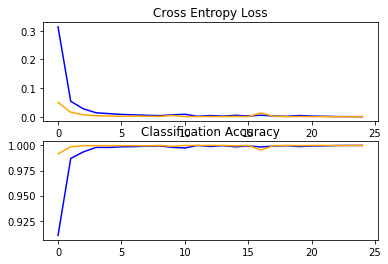

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

## Geting the Test Accuracy

In [0]:
test_labels = test['label']

In [0]:
test.drop('label', axis = 1, inplace = True)

In [0]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = label_binrizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape

(7172, 28, 28, 1)

In [0]:
y_pred = model.predict(test_images)
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.8739542665923034